# Concluciones del proceso

Durante el segundo cuatrimestre de 2025, se llevaron a cabo 13 env√≠os semanales de MS a ADRES. A nivel mensual, se glosaron 39 registros en mayo (26 validados, 66.7% de efectividad) , 19 en junio (8 validados, 42.1% de efectividad) , 19 en julio (12 validados, 63.2% de efectividad) , y 19 en agosto (6 validados, 31.6% de efectividad). En total, se glosaron 96 registros, de los cuales 52 se resolvieron dentro del mismo mes, con un promedio de efectividad mensual del 50.9%.

Desglosando por env√≠o, el volumen de glosados vari√≥ entre 3 y 35, y la tasa de correcci√≥n oscil√≥ desde un m√≠nimo del 0% hasta un m√°ximo del 66.7%, con un promedio de 42.6% por ciclo. Este patr√≥n demuestra que los meses con m√°s cortes, como mayo y julio, consiguieron mayores oportunidades de reenv√≠o y, por consiguiente, una mejor limpieza de glosas, mientras que una menor efectividad en junio y agosto se correlaciona con la frecuencia de los env√≠os en esos meses.

# 1. Modulos

In [51]:
import pandas as pd
import numpy as np
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import openpyxl
import xlsxwriter
from docx import Document
from datetime import datetime
import matplotlib.pyplot as plt
import squarify
import subprocess
import os
import dataframe_image as dfi
import kaleido

# 2. Rutas y contantes

In [52]:
R_Glosas = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Constantes\Glosas ADRES 2025.xlsx"
R_MS_Neg = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\MS\MS Negado\All_MS_NEG.TXT"
R_MS_Val = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Procesos BDUA EPS\MS\MS Validados\All_MS_VAL.TXT"

R_Salida = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc√≥n Z\informes\2025\CTO135.2025 Informe  #9\ACTIVIDAD 14\Analisis detallado MS negados"

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 0) Prepara rutas y carpetas
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

ruta_excel   = os.path.join(R_Salida, "Metricas_Glosas_MS_entrega.xlsx")

In [53]:
# Convertir las constantes a objetos datetime
Mes_Ini = datetime.strptime('01/05/2025', '%d/%m/%Y')
Mes_Fin = datetime.strptime('30/08/2025', '%d/%m/%Y')

# ajusta a tu nombre real
notebook = r"C:\Users\osmarrincon\Documents\capresoca-data-automation\notebooks\Aseguramiento\Inf_Ejec_MS_NEG.ipynb"

In [54]:
type(Mes_Fin)

datetime.datetime

# 3. Cargue de Dataframes 

In [55]:
df_glosas = pd.read_excel(R_Glosas, sheet_name="Glosas de Negocio_BDUA", usecols="A:B", header=0, dtype=str)

Df_MS_Neg = pd.read_csv(R_MS_Neg, sep=',', header=0, dtype=str, encoding='ANSI')
Df_MS_Val = pd.read_csv(R_MS_Val, sep=',', header=0, dtype=str, encoding='ANSI')


# 4. Limpieza de dataframes

## 4.1 dicionario de Glosas

In [56]:
df_glosas.columns = df_glosas.columns.str.strip()
# Reemplazar cadenas vac√≠as que contienen solo espacios por NaN
df_glosas[['Glosa', 'Descripci√≥n']] = df_glosas[['Glosa', 'Descripci√≥n']].replace(r'^\s*$', np.nan, regex=True)
# Eliminar las filas donde ambas columnas son NaN
df_glosas = df_glosas.dropna(subset=['Glosa', 'Descripci√≥n'], how='all')

# N√∫mero de registros antes de eliminar duplicados
n_registros_antes = len(df_glosas)
print("N√∫mero de registros antes de eliminar duplicados:", n_registros_antes)

# Eliminar duplicados de la columna "Glosa"
df_glosas = df_glosas.drop_duplicates(subset="Glosa")

# N√∫mero de registros despu√©s de eliminar duplicados
n_registros_despues = len(df_glosas)
print("N√∫mero de registros despu√©s de eliminar duplicados:", n_registros_despues)


N√∫mero de registros antes de eliminar duplicados: 206
N√∫mero de registros despu√©s de eliminar duplicados: 206


In [57]:
# Calcular la longitud de cada valor de la columna 'Glosa'
lengths = df_glosas['Glosa'].astype(str).str.len()

# Determinar la longitud m√°s frecuente (la modalidad)
majority_length = lengths.mode()[0]
print("Longitud mayoritaria:", majority_length)

# Filtrar las filas donde la longitud es diferente a la mayoritaria
different_rows = df_glosas[lengths != majority_length]
print("Filas con una longitud diferente a la mayor√≠a:")
print(different_rows)

Longitud mayoritaria: 6
Filas con una longitud diferente a la mayor√≠a:
       Glosa  \
159   GN0161   

                                                                                                                                         Descripci√≥n  
159  La solicitud de tr√°mite de traslado a la misma entidad, solo es v√°lido si se est√° activando al usuario. EL usuario debe estar en estado RE, DE.  


## 4.2. MS negado

In [58]:
# Convertir las columnas a formato datetime
Df_MS_Neg['AFL_FECHA_NACIMIENTO'] = pd.to_datetime(Df_MS_Neg['AFL_FECHA_NACIMIENTO'], format='%d/%m/%Y')
Df_MS_Neg['CND_AFL_FECHA_INICIO'] = pd.to_datetime(Df_MS_Neg['CND_AFL_FECHA_INICIO'], format='%d/%m/%Y')
Df_MS_Neg['Fecha_Proceso'] = pd.to_datetime(Df_MS_Neg['Fecha_Proceso'], format='%d/%m/%Y')

In [59]:
print("N√∫mero de registros antes de filtrar Fecha proceso:", len(Df_MS_Neg))
# Filtrar registros dentro del rango de fechas
Df_MS_Neg = Df_MS_Neg[(Df_MS_Neg['Fecha_Proceso'] >= Mes_Ini) & (Df_MS_Neg['Fecha_Proceso'] <= Mes_Fin)]
print("N√∫mero de registros despues de filtrar fecha proceso:", len(Df_MS_Neg))

N√∫mero de registros antes de filtrar Fecha proceso: 22438
N√∫mero de registros despues de filtrar fecha proceso: 134


## 4.3 MS validados

In [60]:
# Convertir las columnas a formato datetime
Df_MS_Val['AFL_FECHA_NACIMIENTO'] = pd.to_datetime(Df_MS_Val['AFL_FECHA_NACIMIENTO'], format='%d/%m/%Y')
Df_MS_Val['CND_AFL_FECHA_INICIO'] = pd.to_datetime(Df_MS_Val['CND_AFL_FECHA_INICIO'], format='%d/%m/%Y')
Df_MS_Val['Fecha_Proceso'] = pd.to_datetime(Df_MS_Val['Fecha_Proceso'], format='%d/%m/%Y')

In [61]:
print("N√∫mero de registros antes de filtrar Fecha proceso:", len(Df_MS_Val))
# Filtrar registros dentro del rango de fechas
Df_MS_Val = Df_MS_Val[(Df_MS_Val['Fecha_Proceso'] >= Mes_Ini) & (Df_MS_Val['Fecha_Proceso'] <= Mes_Fin)]
print("N√∫mero de registros despues de filtrar fecha proceso:", len(Df_MS_Val))

N√∫mero de registros antes de filtrar Fecha proceso: 19910
N√∫mero de registros despues de filtrar fecha proceso: 373


# 5. Analisis de los Datos

## 5.1. m√©tricas inicales

### 5.1 C√°lculo de glosas reales por registro
¬øPor qu√© agrupamos por llave ‚Äútotal‚Äù y no por fecha de reporte?

Llave de negocio constante

(ENT_ID, TPS_IDN_ID, HST_IDN_NUMERO_IDENTIFICACION) identifica √∫nica e invariablemente a cada afiliado.

Incluir Fecha_Proceso en la llave crearar√≠a claves distintas para un mismo usuario en cada env√≠o, rompiendo la trazabilidad.

Fecha_Proceso como dimensi√≥n temporal

La usamos fuera de la llave para:

Ordenar cronol√≥gicamente las glosas.

Filtrar por cortes (cuatrimestrales, √∫ltimos env√≠os, etc.).

Determinar la ‚Äú√∫ltima glosa‚Äù de cada afiliado y qui√©n queda pendiente.

Beneficio

Obtenemos m√©tricas globales (total de glosas, promedio de reintentos, registros pendientes) sin fragmentar la identidad.

Podemos profundizar por per√≠odo sin comprometer la agregaci√≥n hist√≥rica.

In [62]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Definir la llave √∫nica de afiliado
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
keys = ["ENT_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]

Df_MS_Neg["_key"] = (
    Df_MS_Neg[keys]
      .astype(str)
      .agg('|'.join, axis=1)
)
Df_MS_Val["_key"] = (
    Df_MS_Val[keys]
      .astype(str)
      .agg('|'.join, axis=1)
)

### 5.1.2. Contar cu√°ntas glosas tuvo cada registro

In [63]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Contar ‚Äúglosas reales‚Äù en cada fila
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
def contar_glosas(texto: str) -> int:
    # cada glosa est√° separada por ';'
    trozos = texto.strip(';').split(';')
    return sum(1 for g in trozos if g)

Df_MS_Neg["n_glosas"] = Df_MS_Neg["GLOSA"].apply(contar_glosas)


### 5.1.3. ¬øCu√°ntos registros terminaron validados?

In [64]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Agregar total de glosas por registro
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
neg_count = (
    Df_MS_Neg
      .groupby("_key")["n_glosas"]
      .sum()
      .rename("total_glosas")
      .reset_index()
)

# Distribuci√≥n de glosas
print(neg_count["total_glosas"].value_counts().sort_index())

# Promedio de glosas por registro
print("Promedio de glosas por registro:",
      neg_count["total_glosas"].mean())

total_glosas
1     65
2      7
3      4
4      2
6      3
8      2
13     2
Name: count, dtype: int64
Promedio de glosas por registro: 1.8705882352941177


### 5.1.4. ¬øCu√°ntas veces, en promedio, se glos√≥ un registro antes de validarse?

In [65]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) ¬øCu√°ntos registros terminaron validados?
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
val_keys = set(Df_MS_Val["_key"])
neg_count["fue_validado"] = neg_count["_key"].isin(val_keys)

print(f"De {len(neg_count)} registros negados, "
      f"{neg_count['fue_validado'].sum()} acabaron validados.")


De 85 registros negados, 58 acabaron validados.


### 5.1.5 Promedio de glosas antes de validar

In [66]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Promedio de glosas antes de validar
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
promedio_antes = neg_count.loc[
    neg_count["fue_validado"], "total_glosas"
].mean()
print("Promedio de glosas antes de validar:", promedio_antes)

Promedio de glosas antes de validar: 1.4137931034482758


### 5.1.6 Registros glosados en el √∫ltimo env√≠o
Entendemos que el ‚Äú√∫ltimo reporte‚Äù es la fecha m√°xima de Fecha_Proceso (ultimo reporte del mes). Los registros glosados en esa fecha son los que pasan al siguiente cuatrimestre:

In [67]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 6) Registros glosados en el √∫ltimo env√≠o
#    (pendientes para el pr√≥ximo cuatrimestre)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
ultima_fecha = Df_MS_Neg["Fecha_Proceso"].max()
quedan_para_siguiente = (
    Df_MS_Neg
      .loc[Df_MS_Neg["Fecha_Proceso"] == ultima_fecha, "_key"]
      .nunique()
)
print("Registros glosados en el √∫ltimo env√≠o (pendientes):",
      quedan_para_siguiente)

Registros glosados en el √∫ltimo env√≠o (pendientes): 13


### 5.1.7 Identificar registros glosados sin re-env√≠o

In [68]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 7) Identificar registros glosados sin re-env√≠o
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

# a) Obtengo la √∫ltima fecha de glosa de cada afiliado
last_neg = (
    Df_MS_Neg
      .groupby("_key")["Fecha_Proceso"]
      .max()
      .reset_index()
      .rename(columns={"Fecha_Proceso":"last_neg_date"})
)

# b) Marco si hubo re-env√≠o posterior a esa fecha
#    uniendo con el mismo Df_MS_Neg y comprobando fechas
tmp = Df_MS_Neg.merge(last_neg, on="_key", how="inner")
tiene_reenvio = (
    tmp
      .assign(flag = tmp["Fecha_Proceso"] > tmp["last_neg_date"])
      .groupby("_key")["flag"]
      .any()
      .reset_index()
      .rename(columns={"flag":"tiene_reenvio"})
)

last_neg = last_neg.merge(tiene_reenvio, on="_key")

# c) Filtrar los que NO tuvieron re-env√≠o y adem√°s NO est√°n en validados
val_keys = set(Df_MS_Val["_key"])
no_reenviado = last_neg[
    (~ last_neg["tiene_reenvio"]) &
    (~ last_neg["_key"].isin(val_keys))
]

print("Registros glosados que no volvieron a enviarse:", len(no_reenviado))


Registros glosados que no volvieron a enviarse: 27


## 5.2. diagn√≥stico de los registros glosados que no se volvieron a enviar

### 5..2.1 Identificar los afiliados sin re-env√≠o
Partimos del DataFrame last_neg (o de no_reenviado) que ya contiene la llave _key de quienes no tuvieron un env√≠o posterior y no fueron validados:

In [69]:
# Asumiendo que ya tienes `no_reenviado` con la lista de keys:
keys_no_re = set(no_reenviado["_key"])

# Filtramos todas las filas originales de Df_MS_Neg de estos keys:
df_nr = Df_MS_Neg[ Df_MS_Neg["_key"].isin(keys_no_re) ].copy()

### 5.2.2 ‚ÄúExplotar‚Äù cada glosa en una fila
Convertimos la columna 'Glosa' (con uno o varios GNxxxx(...) separados por ;) en filas independientes:

In [70]:
# 1) Separamos por `;`
df_nr["lst_glosa"] = df_nr["GLOSA"].str.strip(";").str.split(";")

# 2) Explode para tener una fila por cada glosa
df_expl = df_nr.explode("lst_glosa").rename(columns={"lst_glosa":"glosa_raw"})

# 3) Extraemos el c√≥digo (primeros 6 caracteres: GN + 4 d√≠gitos)
df_expl["GN"] = df_expl["glosa_raw"].str[:6]


### 5.2.3 Unir con el diccionario de glosas

In [71]:
df_expl = (
    df_expl
      .merge(
         df_glosas,
         left_on="GN",
         right_on="Glosa",    # suponiendo que en df_glosas la columna de c√≥digo se llama "Glosa"
         how="left"
      )
      .rename(columns={"Descripci√≥n":"descr_glosa"})
)


### 5.2.4 Contar y visualizar las causas
1. Top c√≥digos que no se re-env√≠an:

In [72]:
top_glosas = df_expl["GN"].value_counts().head(10)
print(top_glosas)

GN
GN0013    29
GN0169    27
GN0009     5
GN0011     5
GN0302     5
GN0258     5
GN0146     1
Name: count, dtype: int64


2. Tabla con descripci√≥n:

In [73]:
# 1) Permitir mostrar texto completo en las celdas
pd.set_option("display.max_colwidth", None)

# 2) Armar la tabla de glosas con descripci√≥n
top_tabla = (
    df_expl[["GN", "descr_glosa"]]
      .drop_duplicates(subset=["GN"])
      .set_index("GN")
      .loc[top_glosas.index]
)

# 3) Quitar el nombre del √≠ndice (para que solo haya un encabezado)
top_tabla.index.name = None

datos = top_glosas.sort_values()
# ---------------------------------------------------
# datos = top_glosas  # Serie index=GN, values=conteo
top_tabla["Frecuencia"] = datos.reindex(top_tabla.index).fillna(0).astype(int)

# ---------------------------------------------------
# 2) Reordenar columnas: Frecuencia primero
# ---------------------------------------------------
top_tabla = top_tabla[["Frecuencia", "descr_glosa"]]

# ---------------------------------------------------
# 3) Preparar estilos con pandas Styler
# ---------------------------------------------------
pd.set_option("display.max_colwidth", None)    # que no trunque el texto

# Definimos estilos CSS para la tabla
styles = [
    # Encabezado
    {
      "selector": "th",
      "props": [
        ("background-color", "#4F81BD"),
        ("color", "white"),
        ("font-weight", "bold"),
        ("text-align", "center"),
        ("padding", "8px")
      ]
    },
    # Celdas de datos
    {
      "selector": "td",
      "props": [
        ("padding",        "6px"),
        ("border",         "1px solid #dddddd")
      ]
    },
    # Alineamos la columna Frecuencia al centro
    {
      "selector": "td.row0.col0, td.row1.col0, td.row2.col0, td.row3.col0, td.row4.col0, td.row5.col0, td.row6.col0",
      "props": [("text-align", "center")]
    },
    # Celda de √≠ndice (GN) con negrita
    {
      "selector": "th.row_heading",
      "props": [("font-weight", "bold")]
    }
]

styled = (
    top_tabla.style
      .set_table_styles(styles)
      .format({"Frecuencia": "{:d}"})    # formateo entero sin decimales
)

In [74]:
# ---------------------------------------------------
# 1) Limitar ancho de tabla y permitir wrap
# ---------------------------------------------------
styled = (
    top_tabla.style

      # 1.1) Ancho total y fixed layout
      .set_table_attributes(
          'style="width:500px; table-layout: fixed; margin-left: auto; margin-right: auto;"'
      )

      # 1.2) Estilos generales y de header (como ya ten√≠as)
      .set_table_styles(styles)

      # 1.3) Para TODAS las celdas: envolver texto y permitir break-word
      .set_properties(
          **{
             "white-space": "normal", 
             "word-wrap":   "break-word",
             "overflow":    "hidden"
          }
      )

      # 1.4) Formato de la frecuencia
      .format({"Frecuencia": "{:d}"})
)

# ---------------------------------------------------
# 2) Mostrar en el notebook
# ---------------------------------------------------
display(styled)

3. Usar un treemap
Un treemap condensa proporci√≥n + etiquetas (c√≥digos) en rect√°ngulos de distinto tama√±o. Con squarify queda as√≠:

In [75]:
# Ordenar de menor a mayor para barras horizontales
datos = top_glosas.sort_values()
top3 = datos.nlargest(3)
other = datos.iloc[3:].sum()
# Crear una nueva serie con "Otros"
otros_serie = pd.Series({"Otros": other})
# Usar pd.concat para combinar las series
resumen = pd.concat([top3, otros_serie])

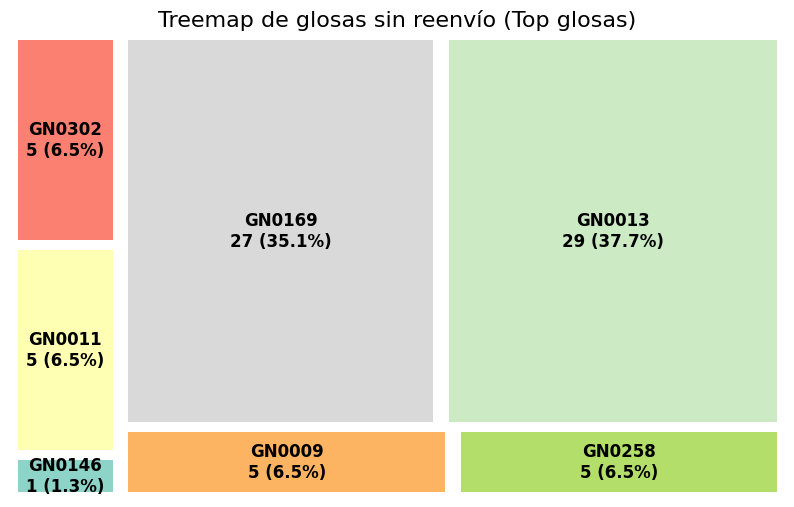

In [76]:
import os
import matplotlib.pyplot as plt
import squarify

# 1) Crea la carpeta de gr√°ficas si no existe
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Genera la figura y el treemap
fig = plt.figure(figsize=(10, 6))
sizes = datos.values
total = sizes.sum()
labels = [
    f"{code}\n{count} ({count/total*100:.1f}%)"
    for code, count in zip(datos.index, sizes)
]
cmap = plt.cm.Set3
colors = [cmap(i/len(sizes)) for i in range(len(sizes))]

squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    pad=True,
    text_kwargs={'fontsize':12, 'weight':'bold'}
)
plt.axis('off')
plt.title("Treemap de glosas sin reenv√≠o (Top glosas)", fontsize=16)

# 3) Guardar la figura en archivo
ruta_png = os.path.join(graficas_dir, "treemap_glosas.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 4) mostrarla en pantalla
plt.show()


## 5.3 Tiempo de resoluci√≥n
* ¬øCu√°nto tarda, en promedio, desde la primera glosa de un registro hasta que finalmente se valida (o queda pendiente)?
* C√°lculo: para cada _key,

En esta secci√≥n calculamos el tiempo (en d√≠as) que transcurre desde la **primera glosa** de cada afiliado hasta que finalmente aparece **validado** en ADRES.  
Este indicador nos ayudar√° a identificar cuellos de botella en el proceso de correcci√≥n y reenv√≠o.

**Pasos**:   
1. Para cada afiliado (`_key`), obtener las fechas de primera glosa y primera validaci√≥n.  
2. Calcular la diferencia en d√≠as.  
3. Generar estad√≠sticas descriptivas y visualizar la distribuci√≥n.


In [77]:
# 5.3.1 Fecha de primera glosa por afiliado
primera_neg = (
    Df_MS_Neg
      .groupby("_key")["Fecha_Proceso"]
      .min()
      .rename("fecha_primera_glosa")
)

# Fecha de primera validaci√≥n por afiliado
primera_val = (
    Df_MS_Val
      .groupby("_key")["Fecha_Proceso"]
      .min()
      .rename("fecha_primera_validacion")
)

# Unir en un √∫nico DataFrame
df_tiempo = pd.concat([primera_neg, primera_val], axis=1).dropna()

### 5.3.1. Medir resoluci√≥n en ‚Äúciclos de env√≠o‚Äù en vez de d√≠as
En lugar de contar d√≠as, calculemos cu√°ntos env√≠os tard√≥ cada registro:

In [78]:
# 5.3.4 A√±adir columna de d√≠as de resoluci√≥n
df_tiempo["dias_resolucion"] = (
    df_tiempo["fecha_primera_validacion"] - 
    df_tiempo["fecha_primera_glosa"]
).dt.days

# Estad√≠sticas descriptivas
stats = df_tiempo["dias_resolucion"].describe().round(1)
print("Estad√≠sticas de tiempo de resoluci√≥n (d√≠as):\n", stats)


Estad√≠sticas de tiempo de resoluci√≥n (d√≠as):
 count    58.0
mean      9.3
std       4.8
min       7.0
25%       7.0
50%       7.0
75%       7.0
max      28.0
Name: dias_resolucion, dtype: float64


### 5.3.2 Visualizaci√≥n de la distribuci√≥n

‚Äì **Histograma** para ver la forma de la distribuci√≥n.  
‚Äì **Boxplot** para identificar posibles valores at√≠picos (outliers).


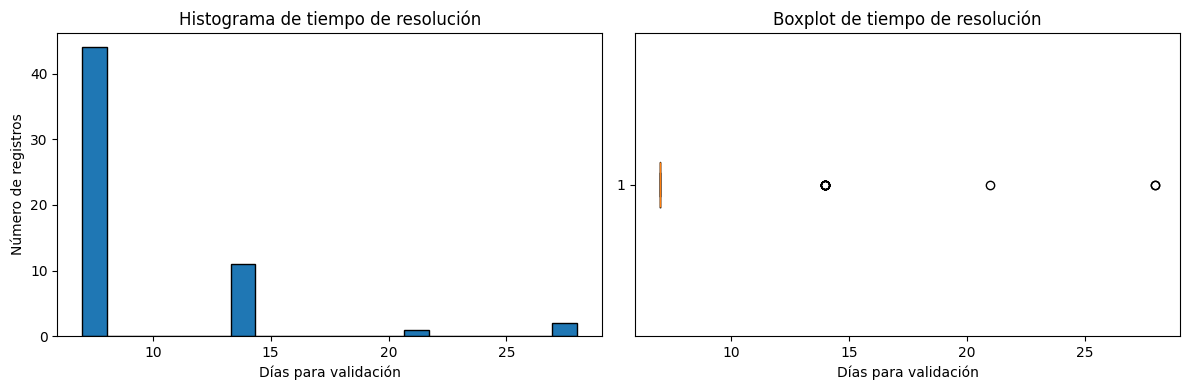

In [79]:
import os
import matplotlib.pyplot as plt

# 1) Aseg√∫rate de tener definida tu carpeta de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Crea la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# Histograma
ax1.hist(df_tiempo["dias_resolucion"], bins=20, edgecolor='k')
ax1.set_xlabel("D√≠as para validaci√≥n")
ax1.set_ylabel("N√∫mero de registros")
ax1.set_title("Histograma de tiempo de resoluci√≥n")

# Boxplot
ax2.boxplot(df_tiempo["dias_resolucion"], vert=False)
ax2.set_xlabel("D√≠as para validaci√≥n")
ax2.set_title("Boxplot de tiempo de resoluci√≥n")

plt.tight_layout()

# 3) Guardar la figura completa
ruta_png = os.path.join(graficas_dir, "tiempo_resolucion.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 4) Mostrar en el notebook (opcional)
plt.show()

**Interpretaci√≥n r√°pida**:  
- La media y mediana nos indican el tiempo t√≠pico de resoluci√≥n.  
- El histograma muestra si hay sesgos o concentraciones en rangos de d√≠as.  
- El boxplot revela outliers que podr√≠an requerir un tratamiento especial (casos que tardan demasiado).  

### 5.3.3. Medir resoluci√≥n en ‚Äúciclos de env√≠o‚Äù en vez de d√≠as
En lugar de contar d√≠as, calculemos cu√°ntos env√≠os tard√≥ cada registro:

In [80]:
import pandas as pd

# 1. Generar la serie de fechas de env√≠o (viernes h√°biles seg√∫n ADRES)
#    Aqu√≠ simplificamos a todos los viernes; en producci√≥n podr√≠as ajustar feriados.
envios = pd.date_range(
    start= Df_MS_Neg["Fecha_Proceso"].min().floor('D'),
    end= Df_MS_Val["Fecha_Proceso"].max().ceil('D'),
    freq='W-FRI'
)

# 2. Funci√≥n para contar env√≠os entre dos fechas
def ciclos_entre(fecha_ini, fecha_val):
    return ((envios > fecha_ini) & (envios <= fecha_val)).sum()

# 3. Aplicar al DataFrame de tiempos
df_tiempo["ciclos_resolucion"] = df_tiempo.apply(
    lambda row: ciclos_entre(
        row["fecha_primera_glosa"], 
        row["fecha_primera_validacion"]
    ),
    axis=1
)

# 4. Estad√≠sticas de ciclos
print("Distribuci√≥n de ciclos de resoluci√≥n:\n",
      df_tiempo["ciclos_resolucion"].value_counts().sort_index())
print("\nPromedio de ciclos:", df_tiempo["ciclos_resolucion"].mean().round(1))


Distribuci√≥n de ciclos de resoluci√≥n:
 ciclos_resolucion
1    44
2    11
3     1
4     2
Name: count, dtype: int64

Promedio de ciclos: 1.3


### 5.3.4 Visualizar ciclos de resoluci√≥n

In [81]:
print(Df_MS_Neg['Fecha_Proceso'].dtypes)

datetime64[ns]


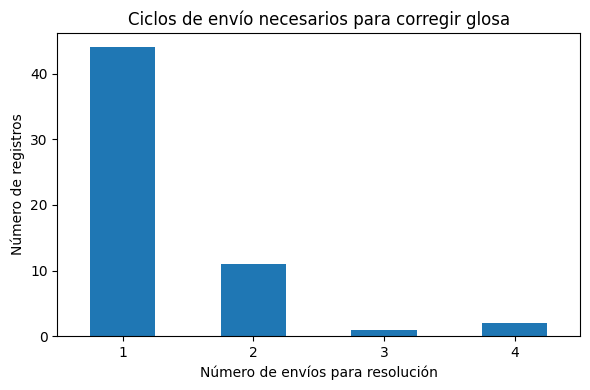

In [82]:
import os
import matplotlib.pyplot as plt

# 1) Aseg√∫rate de que exista la carpeta de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Crear la figura y el eje
fig, ax = plt.subplots(figsize=(6,4))

# 3) Dibujar el bar plot
df_tiempo["ciclos_resolucion"]\
    .value_counts()\
    .sort_index()\
    .plot.bar(ax=ax)

ax.set_xlabel("N√∫mero de env√≠os para resoluci√≥n")
ax.set_ylabel("N√∫mero de registros")
ax.set_title("Ciclos de env√≠o necesarios para corregir glosa")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()

# 4) Guardar la figura
ruta_png = os.path.join(graficas_dir, "ciclos_resolucion.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 5) Mostrar (opcional)
plt.show()


## 5.4 An√°lisis de combinaciones de glosas

En muchos casos un **mismo registro** recibe **varias glosas** en un solo env√≠o.  
Detectar patrones de **co-ocurrencia** de c√≥digos nos ayuda a identificar combinaciones frecuentes que podr√≠an tener causas comunes o requerir un mismo proceso de correcci√≥n.  

**Pasos**:  
1. Para cada fila de `Df_MS_Neg`, parsear la lista de c√≥digos GN.  
2. Generar todas las **parejas** posibles de c√≥digos dentro de cada fila.  
3. Contar cu√°ntas veces aparece cada **par** en todo el conjunto.  
4. Mostrar los **top 10 pares** m√°s frecuentes y un **heatmap** de co-ocurrencia para los principales c√≥digos.
### 5.5.1 Extraer lista de c√≥digos por fila y generar pares

In [83]:
# 5.5.1 Extraer lista de c√≥digos por fila y generar pares
import pandas as pd
from itertools import combinations
from collections import Counter

# Asegurarnos de tener df_expl/df_nr o volver a parsear desde Df_MS_Neg
# Aqu√≠ volvemos a extraer de Df_MS_Neg
def lista_gn(glosa_str):
    return [g[:6] for g in glosa_str.strip(";").split(";") if g]

# Generate pairs counter
pair_counter = Counter()
for lst in Df_MS_Neg["GLOSA"].dropna().apply(lista_gn):
    # solo filas con al menos 2 glosas
    if len(lst) > 1:
        for a,b in combinations(sorted(set(lst)), 2):
            pair_counter[(a,b)] += 1

# Top 10 pares m√°s frecuentes
top_pairs = pair_counter.most_common(10)
top_pairs_df = pd.DataFrame(top_pairs, columns=["Par", "Frecuencia"])
top_pairs_df

Par  Frecuencia
0  (GN0169, GN0258)           9
1  (GN0011, GN0146)           6
2  (GN0009, GN0011)           5
3  (GN0009, GN0302)           4
4  (GN0011, GN0302)           4
5  (GN0009, GN0146)           1
6  (GN0011, GN0258)           1
7  (GN0146, GN0258)           1

### 5.4.2 Visualizar los 10 pares m√°s frecuentes

La tabla anterior muestra los pares de GN que m√°s aparecen juntos.


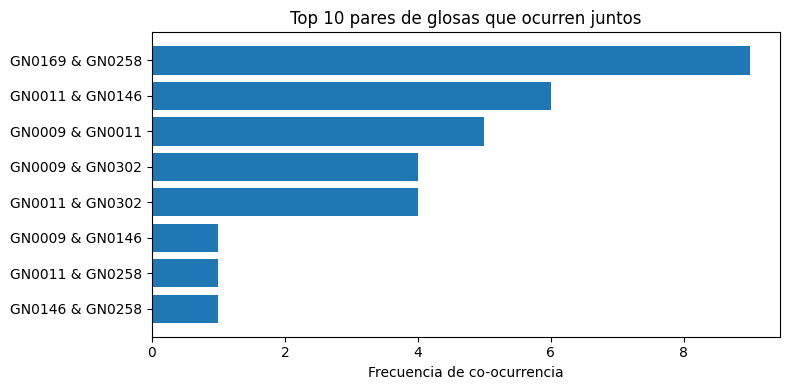

In [84]:
import os
import matplotlib.pyplot as plt

# 1) Asegurarnos de que exista la carpeta Graficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Preparar datos
pairs = [" & ".join(p) for p,_ in top_pairs]
freqs = [f for _,f in top_pairs]

# 3) Crear figura y eje
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(pairs[::-1], freqs[::-1])
ax.set_xlabel("Frecuencia de co-ocurrencia")
ax.set_title("Top 10 pares de glosas que ocurren juntos")
plt.tight_layout()

# 4) Guardar la figura
ruta_png = os.path.join(graficas_dir, "top_pares_glosas.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 5) Mostrar en notebook (opcional)
plt.show()


### 5.4.3 Heatmap de co-ocurrencia para los principales c√≥digos

Para un vistazo m√°s amplio, construimos una matriz de co-ocurrencia para los **top 6** c√≥digos individuales y la mostramos como heatmap.


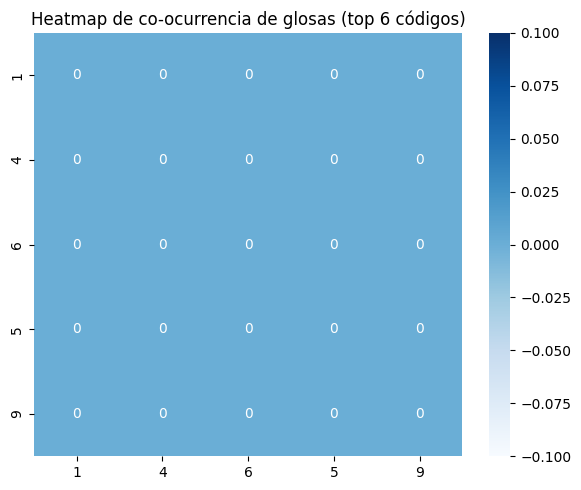

In [85]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1) Asegurar carpeta de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Preparar datos para el heatmap
top_codes = pd.Series(pair_counter).explode().value_counts().head(6).index.tolist()
mat = pd.DataFrame(0, index=top_codes, columns=top_codes)
for (a,b), cnt in pair_counter.items():
    if a in top_codes and b in top_codes:
        mat.loc[a,b] = cnt
        mat.loc[b,a] = cnt

# 3) Crear figura y dibujar heatmap
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Heatmap de co-ocurrencia de glosas (top 6 c√≥digos)")
plt.tight_layout()

# 4) Guardar en archivo PNG
ruta_png = os.path.join(graficas_dir, "heatmap_coocurrencia.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 5) Mostrar en el notebook
plt.show()


**Interpretaci√≥n**:  
- El bar chart revela qu√© combinaciones de glosas suelen aparecer juntas, sugiriendo procesos de correcci√≥n simult√°neos.  
- El heatmap muestra la relaci√≥n entre los **c√≥digos m√°s cr√≠ticos**, ayud√°ndote a priorizar validaciones conjuntas o flujos de trabajo mixtos.


## 5.5. Efectividad de Correcci√≥n

En esta secci√≥n calculamos la **efectividad** de nuestro flujo de glosas, entendida como el porcentaje de registros glosados que finalmente quedan **validados**:

1. **Por env√≠o**: del total de registros glosados en un env√≠o, ¬øqu√© % se valida en el env√≠o siguiente?  
2. **Por mes**: del total de glosados en un mes, ¬øqu√© % se valida en el mismo mes?  
3. **Por cuatrimestre** (cuando tengamos m√°s data): del total de glosados en un cuatrimestre, ¬øqu√© % se valida antes de cerrar el periodo?


### 5.5.1 Preparaci√≥n: lista de env√≠os ordenados

In [86]:
# 1) Lista completa de env√≠os
envios = sorted(Df_MS_Neg["Fecha_Proceso"].unique())

efic_envio = []
for i, fecha in enumerate(envios):
    # claves glosadas en este env√≠o
    neg_keys = set(
        Df_MS_Neg.loc[Df_MS_Neg["Fecha_Proceso"] == fecha, "_key"]
    )
    # si hay un siguiente env√≠o, contamos validados; si no, 0
    if i < len(envios) - 1:
        next_fecha = envios[i+1]
        val_next = set(
            Df_MS_Val.loc[Df_MS_Val["Fecha_Proceso"] == next_fecha, "_key"]
        )
        n_val = len(neg_keys & val_next)
    else:
        n_val = 0

    n_tot = len(neg_keys)
    efect = (n_val / n_tot * 100) if n_tot else None

    efic_envio.append({
        "envio": fecha,
        "glosados": n_tot,
        "validados_next": n_val,
        "efectividad": round(efect,1) if efect is not None else None
    })

# 2) Crear el DataFrame final y mostrarlo
df_efic_envio = pd.DataFrame(efic_envio).set_index("envio")
display(df_efic_envio)


glosados  validados_next  efectividad
envio                                            
2025-05-09        35              20         57.1
2025-05-16        10               5         50.0
2025-05-23         8               2         25.0
2025-06-06        16               7         43.8
2025-06-13         5               1         20.0
2025-06-20         7               3         42.9
2025-07-04        10               5         50.0
2025-07-11        11               4         36.4
2025-07-18         6               3         50.0
2025-07-25         3               1         33.3
2025-08-08         6               4         66.7
2025-08-15         4               2         50.0
2025-08-22        13               0          0.0

### 5.5.2 Resultados por env√≠o

| Env√≠o      | Glosados | Validados en pr√≥ximo env√≠o | Efectividad (%) |
|:----------:|:--------:|:--------------------------:|:---------------:|
{{ aqu√≠ ya no necesitas nada, porque la tabla la genera el display() }}

In [87]:
import pandas as pd

# 1. Creamos el DataFrame y redondeamos
df_efic_envio = pd.DataFrame(efic_envio).set_index("envio").round(1)

# 2. Reordenamos las columnas en el orden que queremos ver
df_efic_envio = df_efic_envio[["glosados", "validados_next", "efectividad"]]

# 3. Renombramos para que coincidan con tu tabla de Markdown
df_efic_envio = df_efic_envio.rename(
    columns={
        "glosados": "Glosados",
        "validados_next": "Validados en pr√≥ximo env√≠o",
        "efectividad": "Efectividad (%)"
    }
)

# 4. Opcional: convertimos el √≠ndice a string para que no salga con Timestamp
df_efic_envio.index = df_efic_envio.index.strftime("%Y-%m-%d")

# 5. Mostramos el resultado
from IPython.display import display
display(df_efic_envio)


Glosados  Validados en pr√≥ximo env√≠o  Efectividad (%)
envio                                                            
2025-05-09        35                          20             57.1
2025-05-16        10                           5             50.0
2025-05-23         8                           2             25.0
2025-06-06        16                           7             43.8
2025-06-13         5                           1             20.0
2025-06-20         7                           3             42.9
2025-07-04        10                           5             50.0
2025-07-11        11                           4             36.4
2025-07-18         6                           3             50.0
2025-07-25         3                           1             33.3
2025-08-08         6                           4             66.7
2025-08-15         4                           2             50.0
2025-08-22        13                           0              0.0

### 5.5.3 Gr√°fico de efectividad por env√≠o

1. Gr√°fico combinado: volumen + eficacia

Comparaci√≥n de volumen de glosados y tasa de correcci√≥n por env√≠o

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_4596\2940667496.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_efic_envio.index, rotation=45, ha="right")


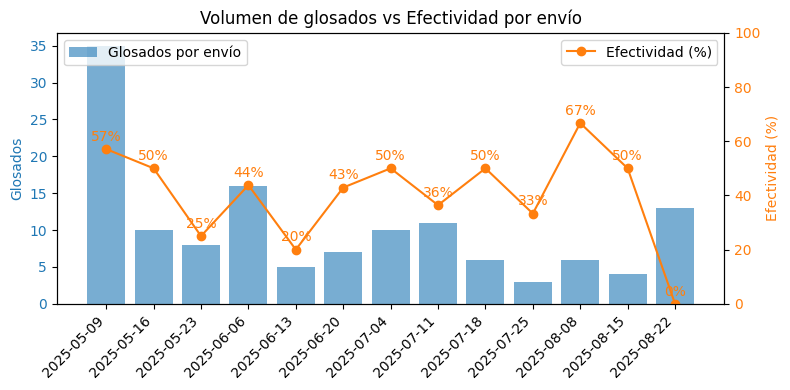

In [88]:
import os
import matplotlib.pyplot as plt

# 1) Aseg√∫rate de tener definida la carpeta de salida de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Crea la figura y los ejes
fig, ax1 = plt.subplots(figsize=(8,4))

# Barras de glosados
ax1.bar(
    df_efic_envio.index,
    df_efic_envio["Glosados"],
    alpha=0.6,
    label="Glosados por env√≠o"
)
ax1.set_ylabel("Glosados", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# L√≠nea de efectividad en eje derecho
ax2 = ax1.twinx()
ax2.plot(
    df_efic_envio.index,
    df_efic_envio["Efectividad (%)"],
    color="tab:orange",
    marker="o",
    label="Efectividad (%)"
)
ax2.set_ylabel("Efectividad (%)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")
ax2.set_ylim(0, 100)

# Anotar valores de eficacia sobre cada punto
for x, y in zip(df_efic_envio.index, df_efic_envio["Efectividad (%)"]):
    ax2.text(x, y + 3, f"{y:.0f}%", ha="center", color="tab:orange")

# Est√©tica
ax1.set_title("Volumen de glosados vs Efectividad por env√≠o")
ax1.set_xticklabels(df_efic_envio.index, rotation=45, ha="right")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()

# 3) Guardar la figura en PNG
ruta_png = os.path.join(graficas_dir, "volumen_vs_efectividad_envio.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 4) Mostrarla en pantalla (opcional)
plt.show()

2. Barras horizontales con umbral

Cumplimiento del 50‚Äâ% de efectividad ‚Äî env√≠os fuera de SLA en rojo

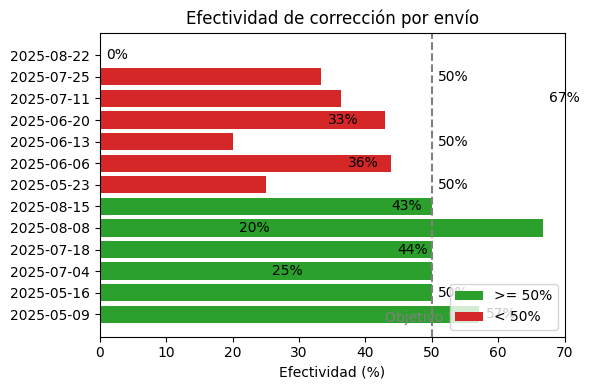

In [89]:
import os
import matplotlib.pyplot as plt

# Asegura que exista la carpeta de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 1) Definimos constantes
THRESHOLD = 50
COLOR_OK   = "tab:green"
COLOR_FAIL = "tab:red"

# 2) Preparamos los datos y la m√°scara
efic = df_efic_envio["Efectividad (%)"]
idx  = df_efic_envio.index
mask_ok   = efic >= THRESHOLD
mask_fail = ~mask_ok

# 3) Dibujamos
fig, ax = plt.subplots(figsize=(6,4))

# Barras de los que cumplen
ax.barh(
    idx[mask_ok],
    efic[mask_ok],
    color=COLOR_OK,
    label=f">= {THRESHOLD}%"
)

# Barras de los que no cumplen
ax.barh(
    idx[mask_fail],
    efic[mask_fail],
    color=COLOR_FAIL,
    label=f"< {THRESHOLD}%"
)

# 4) L√≠nea de umbral y anotaciones
ax.axvline(THRESHOLD, color="gray", linestyle="--")
ax.text(
    THRESHOLD, -0.5,
    f"Objetivo {THRESHOLD}%",
    ha="center", va="bottom", color="gray"
)

for i, v in enumerate(efic):
    ax.text(
        v + 1,
        i,
        f"{v:.0f}%",
        va="center"
    )

# 5) Ejes y leyenda
ax.set_xlabel("Efectividad (%)")
ax.set_title("Efectividad de correcci√≥n por env√≠o")
ax.legend(loc="lower right")

plt.tight_layout()

# 6) Guardar la figura
ruta_png = os.path.join(graficas_dir, "efectividad_envio_horizontal.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 7) Mostrarla en pantalla
plt.show()

### 5.5.4 Efectividad mensual

Para el indicador mensual definimos:
- **Denominador**: todos los registros glosados en el mes ‚ÄúM‚Äù.  
- **Numerador**: de esos, los que quedaron validados **en ese mismo mes** ‚ÄúM‚Äù.

Esto simula tu reporte mensual de efectividad, que excluye validaciones que caen en meses posteriores.


In [90]:
# Agregar mes de proceso
Df_MS_Neg["mes"] = Df_MS_Neg["Fecha_Proceso"].dt.to_period("M")
Df_MS_Val["mes"] = Df_MS_Val["Fecha_Proceso"].dt.to_period("M")

# Calcular efectividad por mes
meses = sorted(Df_MS_Neg["mes"].unique())
efic_mes = []

for mes in meses:
    neg_keys = set(Df_MS_Neg.loc[ Df_MS_Neg["mes"]==mes, "_key" ])
    val_keys = set(Df_MS_Val.loc[ Df_MS_Val["mes"]==mes, "_key" ])
    n_tot = len(neg_keys)
    n_val = len(neg_keys & val_keys)
    efic = n_val / n_tot * 100 if n_tot else None
    efic_mes.append({"mes": str(mes), "glosados":n_tot, "val_mes":n_val, "efectividad":round(efic,1)})


### 5.5.5 Resultados mensuales

| Mes     | Glosados | Validados en mes | Efectividad (%) |
|:-------:|---------:|-----------------:|----------------:|
{{ muestra `df_efic_mes` }}


In [91]:
# Partiendo de tu df_efic_mes ya renombrado
df_efic_mes = pd.DataFrame(efic_mes).set_index("mes")

# Renombrar √≠ndice y columnas
df_efic_mes.index.name = "Mes"
df_efic_mes = df_efic_mes.rename(columns={
    "glosados": "Glosados",
    "val_mes":  "Validados en mes",
    "efectividad": "Efectividad (%)"
})

# Convertir la columna a string con '%'
df_efic_mes["Efectividad (%)"] = (
    df_efic_mes["Efectividad (%)"]
      .map(lambda x: f"{x:.1f}%")
)

# Mostrar
from IPython.display import display
display(df_efic_mes)

Glosados  Validados en mes Efectividad (%)
Mes                                                
2025-05        39                26           66.7%
2025-06        19                 8           42.1%
2025-07        19                12           63.2%
2025-08        19                 6           31.6%

### 5.5.6 Gr√°fico de efectividad mensual

En este gr√°fico mostramos, para cada mes:
- Una barra con la **efectividad (%)** de correcci√≥n.
- Color verde si ‚â• 50 % y rojo si < 50 %.
- L√≠nea discontinua al 50 % como objetivo.

Esto te permitir√° ver r√°pidamente qu√© meses cumplen tu SLA mensual.

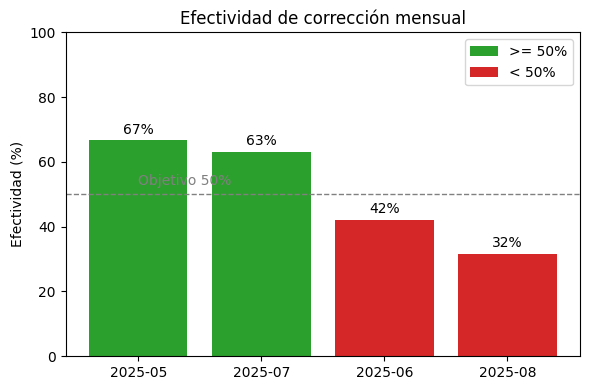

In [92]:
import os

# 1) Aseg√∫rate de que exista la carpeta de gr√°ficas
graficas_dir = os.path.join(R_Salida, "Graficas")
os.makedirs(graficas_dir, exist_ok=True)

# 2) Crear la figura y el gr√°fico de efectividad mensual
import matplotlib.pyplot as plt

THRESHOLD = 50
COLOR_OK   = "tab:green"
COLOR_FAIL = "tab:red"

efic_mes   = df_efic_mes.copy()
efic_vals  = efic_mes["Efectividad (%)"].str.rstrip("%").astype(float)
mask_ok    = efic_vals >= THRESHOLD
mask_fail  = ~mask_ok

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(efic_mes.index[mask_ok],   efic_vals[mask_ok],   color=COLOR_OK,   label=f">= {THRESHOLD}%")
ax.bar(efic_mes.index[mask_fail], efic_vals[mask_fail], color=COLOR_FAIL, label=f"< {THRESHOLD}%")

ax.axhline(THRESHOLD, color="gray", linestyle="--", linewidth=1)
ax.text(efic_mes.index[0], THRESHOLD + 2, f"Objetivo {THRESHOLD}%", color="gray", va="bottom")

for x, v in zip(efic_mes.index, efic_vals):
    ax.text(x, v + 2, f"{v:.0f}%", ha="center")

ax.set_ylabel("Efectividad (%)")
ax.set_title("Efectividad de correcci√≥n mensual")
ax.set_ylim(0, 100)
ax.legend(loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()

# 3) Guardar la figura
ruta_png = os.path.join(graficas_dir, "efectividad_mensual.png")
fig.savefig(ruta_png, bbox_inches="tight")

# 4) Mostrarla en el notebook
plt.show()


> **Utilidad de estos indicadores**  
> - Saber si en cada env√≠o estamos resolviendo la mayor parte de las glosas en el siguiente ciclo.  
> - Detectar si alg√∫n mes (por festivos, puentes o vol√∫menes at√≠picos) baja dram√°ticamente la efectividad.  
> - Reportar a Planeaci√≥n no solo vol√∫menes absolutos, sino la **calidad y rapidez** de la correcci√≥n.

## 5.6 KPIs

A continuaci√≥n, se definen los indicadores clave de desempe√±o (KPIs) recomendados para evaluar el proceso de gesti√≥n de glosas en el notebook:

### 5.6.1. Tasa de cierre integral
**Definici√≥n:** Proporci√≥n de glosas que se consideran cerradas, ya sea mediante validaci√≥n o por no requerir reenv√≠o.
**F√≥rmula:**

In [93]:
# Crear la columna '_key' en ambos DataFrames si no existen
if '_key' not in Df_MS_Neg.columns:
    Df_MS_Neg["_key"] = Df_MS_Neg[["ENT_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]].astype(str).agg('|'.join, axis=1)
if '_key' not in Df_MS_Val.columns:
    Df_MS_Val["_key"] = Df_MS_Val[["ENT_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]].astype(str).agg('|'.join, axis=1)

# Identificar registros no reenviados (c√≥digo de la celda anterior, que es correcto)
last_neg = Df_MS_Neg.groupby("_key")["Fecha_Proceso"].max().reset_index().rename(columns={"Fecha_Proceso": "last_neg_date"})
tmp = Df_MS_Neg.merge(last_neg, on="_key", how="inner")
# CORRECCI√ìN L√ìGICA: Un reenv√≠o existe si hay m√°s de una fecha de proceso
submission_counts = Df_MS_Neg.groupby('_key')['Fecha_Proceso'].nunique()
keys_con_reenvio = submission_counts[submission_counts > 1].index
last_neg['tiene_reenvio'] = last_neg['_key'].isin(keys_con_reenvio)
no_reenviado = last_neg[
    (~last_neg["tiene_reenvio"]) & (~last_neg["_key"].isin(Df_MS_Val["_key"]))
]

# --- C√ÅLCULO CORRECTO DE LA TASA DE CIERRE ---

# 1. Total de afiliados √∫nicos con glosas
total_glosas_unicas = Df_MS_Neg['_key'].nunique()

# 2. Afiliados √∫nicos que fueron validados (y que previamente fueron negados)
keys_negadas = set(Df_MS_Neg['_key'])
keys_validas = set(Df_MS_Val['_key'])
afiliados_validados = len(keys_negadas.intersection(keys_validas))

# 3. Afiliados √∫nicos que se cerraron por no requerir reenv√≠o
afiliados_no_reenviados = no_reenviado['_key'].nunique()

# 4. Tasa de cierre
tasa_cierre = (afiliados_validados + afiliados_no_reenviados) / total_glosas_unicas * 100

print(f"Tasa de cierre integral: {tasa_cierre:.2f}%")

Tasa de cierre integral: 91.76%


**Instrucciones:** Documentar los c√≥digos de glosa incluidos en `no_reenviado` (por ejemplo, GN0013).

### 5.6.2. First-Pass Yield

**Definici√≥n:** Porcentaje de glosas resueltas en el primer ciclo de env√≠o.
**F√≥rmula:**

In [94]:
 # Calcular el ciclo de cada glosa para cada afiliado
Df_MS_Neg['ciclo'] = Df_MS_Neg.groupby('_key')['Fecha_Proceso'].rank(method='dense', ascending=True).astype(int)

# Filtrar solo los registros que fueron glosados en su primer ciclo (primer intento)
glosas_primer_ciclo = Df_MS_Neg[Df_MS_Neg['ciclo'] == 1]

# De esos registros del primer ciclo, ver cu√°ntos fueron validados eventualmente
validado_en_primer_intento = glosas_primer_ciclo['_key'].isin(Df_MS_Val['_key'])

# Calcular el porcentaje de √©xito en el primer intento
first_pass_yield = (validado_en_primer_intento.sum() / len(glosas_primer_ciclo)) * 100

print(f"First-Pass Yield (Tasa de √©xito al primer env√≠o): {first_pass_yield:.2f}%")

First-Pass Yield (Tasa de √©xito al primer env√≠o): 68.24%


### 5.6.3. Backlog de pendientes

**Definici√≥n:** Volumen y antig√ºedad promedio de glosas a√∫n pendientes de resoluci√≥n.
**C√°lculo:**

In [95]:
# 1. Identificar las llaves (_key) de los registros que a√∫n est√°n pendientes
keys_negadas = set(Df_MS_Neg['_key'])
keys_validas = set(Df_MS_Val['_key'])
keys_pendientes = keys_negadas - keys_validas

# 2. Filtrar el DataFrame de negados para obtener solo los registros pendientes
pendientes_df = Df_MS_Neg[Df_MS_Neg['_key'].isin(keys_pendientes)]

# 3. Para cada afiliado pendiente, encontrar la fecha de su √∫ltima glosa
ultima_glosa_pendientes = pendientes_df.groupby('_key')['Fecha_Proceso'].max().reset_index()

# 4. Calcular la antig√ºedad en d√≠as desde la √∫ltima glosa hasta hoy
ultima_glosa_pendientes['antiguedad'] = (pd.Timestamp.today() - ultima_glosa_pendientes['Fecha_Proceso']).dt.days

# 5. Calcular el volumen del backlog y la antig√ºedad promedio
backlog_volumen = len(ultima_glosa_pendientes)
antiguedad_media = ultima_glosa_pendientes['antiguedad'].mean()

print(f"Backlog de pendientes (volumen): {backlog_volumen} registros")
print(f"Antig√ºedad promedio de pendientes: {antiguedad_media:.2f} d√≠as")

Backlog de pendientes (volumen): 27 registros
Antig√ºedad promedio de pendientes: 56.15 d√≠as


**Instrucciones:** Segmentar los pendientes por mes de `fecha_glosa` para detectar cuellos de botella.

### 5.6.4. Glosas vs. volumen total

**Definici√≥n:** Relaci√≥n entre el n√∫mero de glosas y el total de registros MS procesados.
**F√≥rmula:**

In [96]:
# NOTA: El valor de total_ms_procesados debe ser suministrado externamente.
# Por ejemplo, si en el periodo se procesaron 25,000 registros en total:
total_ms_procesados = 25000  # <-- REEMPLAZA ESTE VALOR con el total real de MS procesados

# Total de afiliados √∫nicos con glosas
total_glosas_unicas = Df_MS_Neg['_key'].nunique()

# Calcular la proporci√≥n
glosas_vs_volumen = (total_glosas_unicas / total_ms_procesados) * 100

print(f"Proporci√≥n de Glosas vs. Volumen Total: {glosas_vs_volumen:.2f}%")

Proporci√≥n de Glosas vs. Volumen Total: 0.34%


### 5.6.5. SLA de resoluci√≥n

**Definici√≥n:** Porcentaje de glosas resueltas dentro del plazo objetivo (7 d√≠as).
**F√≥rmula:**

In [97]:
# Usamos el dataframe df_tiempo que ya tiene los d√≠as de resoluci√≥n calculados
# para cada registro que fue validado.

# Contar cu√°ntos registros se resolvieron en 7 d√≠as o menos
dentro_sla = (df_tiempo['dias_resolucion'] <= 7).sum()

# Contar el total de registros que se resolvieron
total_resueltas = len(df_tiempo)

# Calcular el porcentaje de cumplimiento del SLA
sla_resolucion = (dentro_sla / total_resueltas) * 100

print(f"Cumplimiento de SLA de Resoluci√≥n (<= 7 d√≠as): {sla_resolucion:.2f}%")

Cumplimiento de SLA de Resoluci√≥n (<= 7 d√≠as): 75.86%


**Notas finales:**

* Incluir gr√°ficos (l√≠neas de tendencia, barras comparativas) y tablas resumen en el notebook para cada KPI.
* Permitir filtros din√°micos por mes y por c√≥digo de glosa para an√°lisis detallado.
* Documentar claramente las reglas de inclusi√≥n para cada KPI y revisar posibles outliers en fechas.

# 6. Exportaci√≥n del Informe

En esta secci√≥n veremos c√≥mo generar autom√°ticamente:

1. **PDF** del notebook completo (incluyendo texto, c√≥digo y gr√°ficas).  
2. **Excel** con los res√∫menes de m√©tricas (opcional, para acompa√±ar el PDF).

## 6.1 Exportar el notebook a PDF

Usaremos `nbconvert` de Jupyter. Solo necesitas ejecutar:

```bash
!jupyter nbconvert --to pdf "TuNotebook.ipynb" \
    --output "Informe_Glosas_MS.pdf"


In [101]:
import os
import subprocess
from weasyprint import HTML

# 0) Variables
base_name = "Informe_Glosas_MS"

# 1) Asegurar que exista la carpeta
os.makedirs(R_Salida, exist_ok=True)

# 2) Convertir a HTML
cmd = [
    "python", "-m", "nbconvert",
    "--to", "html",
    notebook,
    "--output-dir", R_Salida,
    "--output", base_name
]
proc = subprocess.run(cmd, capture_output=True, text=True)
if proc.returncode != 0:
    print("‚ùå nbconvert fall√≥:\n", proc.stderr)
else:
    print("‚úÖ HTML generado en:", os.path.join(R_Salida, f"{base_name}.html"))

    # 3) Convertir HTML a PDF con WeasyPrint
    html_path = os.path.join(R_Salida, f"{base_name}.html")
    pdf_path  = os.path.join(R_Salida, f"{base_name}.pdf")
    HTML(html_path).write_pdf(pdf_path)
    print("‚úÖ PDF generado en:", pdf_path)

‚úÖ HTML generado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc√≥n Z\informes\2025\CTO135.2025 Informe  #9\ACTIVIDAD 14\Analisis detallado MS negados\Informe_Glosas_MS.html
‚úÖ PDF generado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc√≥n Z\informes\2025\CTO135.2025 Informe  #9\ACTIVIDAD 14\Analisis detallado MS negados\Informe_Glosas_MS.pdf


## 6.2 Exportar m√©tricas clave a Excel

In [99]:
# 1) Preparar df_env con la tasa en fracci√≥n
df_env = df_efic_envio.copy()
df_env["Efectividad (%)"] = df_env["Efectividad (%)"] / 100
# Ahora df_env["Efectividad (%)"] va de 0 a 1

# 2) Preparar df_mes sin columna extra
# Partimos del df_efic_mes (que era strings ‚Äú31.2%‚Äù) y lo convertimos a fracci√≥n
df_mes = df_efic_mes.copy()
df_mes["Efectividad (%)"] = (
    df_mes["Efectividad (%)"]
      .str.rstrip("%")
      .astype(float) / 100
)
# df_mes ya no lleva columna extra, s√≥lo √©sta con valores 0‚Äì1

# 3) Escribir todo en Excel
with pd.ExcelWriter(ruta_excel, engine="xlsxwriter") as writer:
    wb = writer.book

    #### Hoja Envios ####
    df_env.to_excel(
        writer,
        sheet_name="Envios",
        startrow=2,
        index_label="Env√≠o",
        columns=["Glosados", "Validados en pr√≥ximo env√≠o", "Efectividad (%)"]
    )
    ws1 = writer.sheets["Envios"]

    # Formatos
    hdr = wb.add_format({"bold":True, "bg_color":"#4F81BD",
                         "font_color":"white", "align":"center", "border":1})
    i_fmt = wb.add_format({"num_format":"0",    "border":1})
    p_fmt = wb.add_format({"num_format":"0.0%", "border":1})
    bad_fmt = wb.add_format({"bg_color":"#FFC7CE"})

    # Encabezados
    for col, title in enumerate(["Env√≠o","Glosados","Validados en pr√≥ximo env√≠o","Efectividad (%)"]):
        ws1.write(1, col, title, hdr)

    # Anchos
    ws1.set_column(0,0,15)
    ws1.set_column(1,1,10, i_fmt)
    ws1.set_column(2,2,18, i_fmt)
    ws1.set_column(3,3,15, p_fmt)

    ws1.freeze_panes(2,1)
    ws1.autofilter(1,0, 1+len(df_env), 3)

    # Resaltar <50%
    ws1.conditional_format(
        2, 3,
        1+len(df_env), 3,
        {"type":"cell","criteria":"<","value":0.5,"format":bad_fmt}
    )

    #### Hoja Mensual ####
    df_mes.to_excel(
        writer,
        sheet_name="Mensual",
        startrow=2,
        index_label="Mes",
        columns=["Glosados","Validados en mes","Efectividad (%)"]
    )
    ws2 = writer.sheets["Mensual"]

    # Encabezados
    for col, title in enumerate(["Mes","Glosados","Validados en mes","Efectividad (%)"]):
        ws2.write(1, col, title, hdr)

    # Anchos
    ws2.set_column(0,0,12)
    ws2.set_column(1,1,10, i_fmt)
    ws2.set_column(2,2,15, i_fmt)
    ws2.set_column(3,3,15, p_fmt)

    ws2.freeze_panes(2,1)
    ws2.autofilter(1,0, 1+len(df_mes), 3)
    ws2.conditional_format(
        2,3, 1+len(df_mes), 3,
        {"type":"cell","criteria":"<","value":0.5,"format":bad_fmt}
    )

    #### Hojas crudas ###
    Df_MS_Neg.to_excel(writer, sheet_name="MS_Negados", index=False)
    Df_MS_Val.to_excel(writer, sheet_name="MS_Validados", index=False)

print("‚úÖ Excel corregido exportado en:", ruta_excel)

‚úÖ Excel corregido exportado en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc√≥n Z\informes\2025\CTO135.2025 Informe  #9\ACTIVIDAD 14\Analisis detallado MS negados\Metricas_Glosas_MS_entrega.xlsx


## 6.3. Hoja Resumen del Excel con las imagenes

In [100]:
import os
from openpyxl import load_workbook
from openpyxl.drawing.image import Image as XLImage
from openpyxl.styles import Font, Alignment, PatternFill


# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Abrir y borrar Resumen viejo
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
wb = load_workbook(ruta_excel)
if "Resumen" in wb.sheetnames:
    wb.remove(wb["Resumen"])
ws = wb.create_sheet("Resumen", 0)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Columnas y filas compactas
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# S√≥lo usamos A‚ÄìK y alturas de fila reducidas
#for col in "ABCDEFGHIJK":
#    ws.column_dimensions[col].width = 8

#for r in range(4, 14):   ws.row_dimensions[r].height = 60
#for r in range(14, 24):  ws.row_dimensions[r].height = 60

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) T√≠tulo
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
ws.merge_cells("A1:N2")
c = ws["A1"]
c.value     = "Informe Glosas MS Negados ‚Äì Resumen"
c.font      = Font(bold=True, size=16)
c.alignment = Alignment(horizontal="center", vertical="center")
c.fill      = PatternFill("solid", fgColor="D9E1F2")

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Insertar y escalar im√°genes
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
imgs = [
    ("volumen_vs_efectividad_envio.png",   "A3", 0.5, 0.5),
    ("efectividad_envio_horizontal.png",   "H3", 0.5, 0.5),
    ("treemap_glosas.png",                 "A16",0.5, 0.5),
    ("top_pares_glosas.png",               "H16",0.5, 0.5),
]
for fname, anchor, xs, ys in imgs:
    img = XLImage(os.path.join(graficas_dir, fname))
    img.anchor = anchor
    img.width  = img.width  * xs
    img.height = img.height * ys
    ws.add_image(img)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Descripciones compactas
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
desc_fmt = Alignment(wrap_text=True, vertical="top")
desc = [
    ("A13:F14",
     "1) Volumen glosados vs efectividad por env√≠o."),
    ("H13:L14",
     "2) Efectividad con umbral 50 % (verde cumple, rojo no)."),
    ("A29:F30",
     "3) Treemap: GN0013 = 60,3 % de no reenv√≠os."),
    ("H29:L30",
     "4) Pares top de glosas juntas."),
]
for rng, text in desc:
    ws.merge_cells(rng)
    cell = ws[rng.split(":")[0]]
    cell.value     = text
    cell.alignment = desc_fmt

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 6) Guardar
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
wb.save(ruta_excel)
print("‚úÖ Resumen compacto listo en:", ruta_excel)

‚úÖ Resumen compacto listo en: C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc√≥n Z\informes\2025\CTO135.2025 Informe  #9\ACTIVIDAD 14\Analisis detallado MS negados\Metricas_Glosas_MS_entrega.xlsx


## 7. Conclusi√≥n

### **Conclusi√≥n**

Durante el segundo cuatrimestre de 2025, se llevaron a cabo **13 ciclos de env√≠o** semanales de Maestro de Servicios (MS) a ADRES. En total, se procesaron **96 glosas**. De los 85 registros negados, **58 (68.2%)** terminaron validados y **27** no fueron reenviados. Al cierre de agosto, quedaron **13 glosas pendientes** del √∫ltimo env√≠o.

Las glosas **GN0013** y **GN0169** concentraron los rechazos no reenviados [cite: 250-252]. La **efectividad promedio por env√≠o** fue del **42.6%**. A nivel mensual, la efectividad fue la siguiente:

| Mes | Glosados | Validados en mes | Efectividad |
|:---|:---|:---|:---|
| 2025-05 | 39 | 26 | 66.7% |
| 2025-06 | 19 | 8 | 42.1% |
| 2025-07 | 19 | 12 | 63.2% |
| 2025-08 | 19 | 6 | 31.6% |

El tiempo de resoluci√≥n mediano fue de **7 d√≠as**, alineado con el ritmo semanal de env√≠os. Cada registro necesit√≥ en promedio **1.3 ciclos de reenv√≠o** y **1.87 glosas** antes de su validaci√≥n.

---

### **Puntos clave y recomendaciones**

1.  **Glosas dominantes (GN0013 y GN0169)**: La concentraci√≥n de rechazos en estas glosas indica la necesidad de un **filtro autom√°tico previo** que aborde estas causas desde el origen.
2.  **Efectividad por env√≠o y por mes**: La efectividad ha variado significativamente, superando el 60% en mayo y julio, pero cayendo por debajo del 45% en junio y agosto. Se recomienda analizar las causas de la disminuci√≥n en esos meses.
3.  **Ciclos de reenv√≠o y notificaciones tempranas**: Con un promedio de m√°s de una glosa por registro, es conveniente activar **alertas autom√°ticas tras el primer rechazo** para acelerar la correcci√≥n antes del segundo env√≠o.
4.  **Patrones de co-ocurrencia**: Combinaciones frecuentes como **(GN0169 & GN0258)** deben ser validadas en conjunto, **consolidando reglas** para evitar ciclos adicionales.
5.  **Pendientes y no reenviados**: El volumen de 27 registros glosados que no se volvieron a enviar y un backlog de 13 pendientes al cierre sugieren la necesidad de un **informe autom√°tico de ‚Äúpendientes‚Äù** para facilitar su seguimiento y evitar la p√©rdida de casos.

## üìä An√°lisis de Glosas MS Negados

Este notebook (`notebooks/Aseguramiento/Inf_Ejec_MS_NEG.ipynb`) contiene el an√°lisis completo de los registros negados en el Maestro de ingresos (MS) que reporta Capresoca EPS a ADRES.  

üîç **Autor√≠a**  
Este estudio y los algoritmos de extracci√≥n de m√©tricas fueron dise√±ados y desarrollados por **Yesid Rinc√≥n**.  

### Contenido principal
1. **M√©tricas iniciales**: volumen y frecuencia de glosas.  
2. **Tiempo de resoluci√≥n**: distribuci√≥n de d√≠as y ciclos de env√≠o.  
3. **Efectividad**: porcentaje de glosas corregidas por env√≠o y por mes.  
4. **Co-ocurrencia de glosas**: patrones de glosas m√∫ltiples en un mismo registro.  
5. **Dashboard y exportaci√≥n**: generaci√≥n autom√°tica de gr√°ficos y Excel.

> Para ver los resultados completos, abre el notebook y revisa la secci√≥n **7. Conclusi√≥n**, donde se recogen los principales hallazgos y pr√≥ximas acciones.

---

*Puedes clonar este proyecto y ejecutar el notebook con*  
```bash
git clone https://github.com/yesid95/capresoca-data-automation.git
cd capresoca-data-automation/notebooks/Aseguramiento
jupyter lab
